In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

### Synthesize dataset

In [3]:
#init cluster means
cluster_means = np.array([(-7.5, -7.5),(-7.5, -2.5),(-7.5, 2.5),(-7.5, 7.5),(-2.5, -7.5),(-2.5, -2.5),(-2.5, 2.5), (-2.5, 7.5), (2.5, -7.5), (2.5, -2.5), (2.5, 2.5), (2.5, 7.5), (7.5, -7.5), (7.5, -2.5), (7.5, 2.5), (7.5, 7.5)])



In [9]:
data_x = []
data_y = []
data = np.empty((2,50*16))
labels = np.zeros((50*16)) # these are purely used for calculating the rand index
np.random.seed(42)
for mean_i, mean in enumerate(cluster_means):
    points_x = np.random.normal(loc=mean[0], size=50)
    points_y = np.random.normal(loc=mean[1], size=50)
    data[:,mean_i*50:mean_i*50+50] = [points_x, points_y]
    labels[mean_i*50:mean_i*50+50] = mean_i

In [12]:
n_obs = 5
observers = np.empty((2,n_obs))

# random assignment of observers;  
for i_obs in range(n_obs):
    observers[:,i_obs] = np.random.uniform(low=-10, high=10, size = 2)

    
# for reproducability of the original dataset, load these observer locations
observers = np.genfromtxt("data/observer_locations.csv", delimiter = ",").T

In [13]:
observers

array([[ 6.99660116, -5.2710667 ,  6.71479449,  2.44351592, -9.60694859],
       [ 4.1247454 ,  7.15714245, -9.17480268,  8.33191071,  2.7696734 ]])

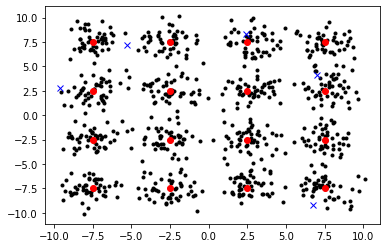

In [14]:
plt.plot(data[0,:], data[1,:], '.', c='black')
plt.plot(observers[0,:], observers[1,:], 'x', c='blue')
for mean in cluster_means:
    plt.plot(mean[0], mean[1], 'o', c='red')

In [17]:
obs1 = {
    'loc' : np.array([observers[0,0], observers[1,0]]),
    'data': [],
    'labels' : []
}

obs2 = {
    'loc' : np.array([observers[0,1], observers[1,1]]),
    'data': [],
    'labels' : []
}

obs3 = {
    'loc' : np.array([observers[0,2], observers[1,2]]),
    'data': [],
    'labels' : []
}

obs4 = {
    'loc' : np.array([observers[0,3], observers[1,3]]),
    'data': [],
    'labels' : []
}

obs5 = {
    'loc' : np.array([observers[0,4], observers[1,4]]),
    'data': [],
    'labels' : []
}

observer_list = np.array([obs1, obs2, obs3, obs4, obs5])
data_total = 50*16
SNR = 4
alpha = 0.025
for i in range(data_total):
    data_point = [data[0,i], data[1,i]]
    label = labels[i]
    hits = np.zeros([5], dtype=bool)
    dists = np.zeros([5])
    for obs_i, obs in enumerate(observer_list):
        dists[obs_i] = np.linalg.norm(obs['loc'] - np.array([data[0,i], data[1,i]]))
        obs_probab = 1-math.exp(-(alpha * SNR) / dists[obs_i])
        hits[obs_i] = np.random.choice([0, 1], p=[1-obs_probab, obs_probab])
    if np.sum(hits) == 0: # if nobody hits, just give the point to the closest observer
        obs = observer_list[np.argmin(dists)]
        obs['data'].append(data_point)
        obs['labels'].append(label)
    else: #if one or more parties hit, give it to the furthest observer
        #print(observer_list[hits])
        furthest_obs = observer_list[np.argmax(dists[hits])]
        furthest_obs['data'].append(data_point)
        furthest_obs['labels'].append(label)

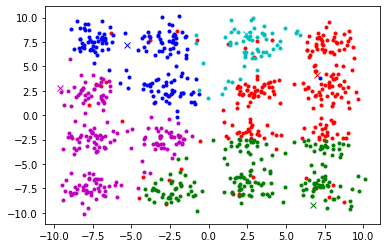

In [18]:
colors = ['r', 'b', 'g', 'c', 'm']
for color, obs in  zip(colors, observer_list):
    plt.plot(obs['loc'][0], obs['loc'][1],'x', color=color)
    for datapoint in obs['data']:
        plt.plot(datapoint[0], datapoint[1], '.', color=color)
#plt.legend()

## save dataset

In [19]:
for i, obs in enumerate(observer_list):
    data_name = "cluster2_client" + str(i) + ".csv"
    label_name = "labels2_client" + str(i) + ".csv"
    np.savetxt(data_name, np.array(obs['data']), delimiter=',')
    np.savetxt(label_name, np.array(obs['labels']), delimiter=",")

In [28]:
# for reproducability/making the graphs, lets save the locations of the observers as well
obs_locs = np.array([obs['loc'] for obs in observer_list])
np.savetxt("observer_locations.csv", obs_locs, delimiter=",")

## Paper visualizations

In [6]:
client_paths = ["data/cluster2_client" + str(i) + ".csv" for i in range(5)]

client_data = []
for path in client_paths:
    client_data.append(np.genfromtxt(path, delimiter=","))
    
observers = np.genfromtxt("data/observer_locations.csv", delimiter = ",")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Text(12.25, 0.5, '$X_2$')

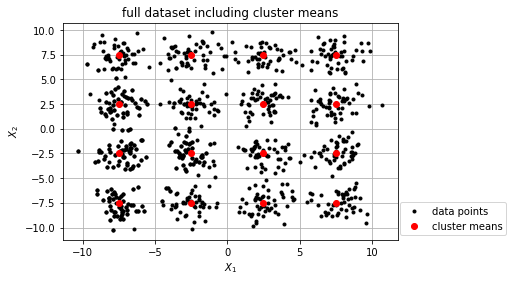

In [82]:
for i,  data in  enumerate(client_data):
    plt.plot(data[:,0], data[:,1], '.' , color='black')
plt.plot(data[:,0], data[:,1], '.' , color='black', label = "data points")

plt.plot(cluster_means[:,0], cluster_means[:,1], 'o', color='red', label="cluster means")
plt.grid(True)
plt.legend(loc= "lower right",  bbox_to_anchor = (1.34, 0))
#plt.legend(loc="lower right")
plt.title("full dataset including cluster means")
plt.savefig("full_dataset.eps", format="eps", bbox_inches="tight")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


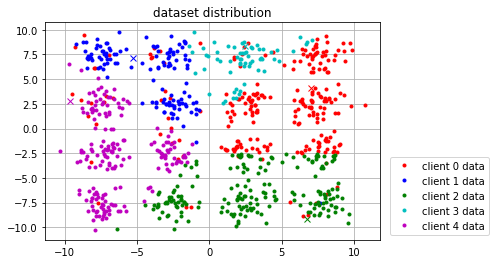

In [83]:
colors = ['r', 'b', 'g', 'c', 'm']
for i,  data in  enumerate( client_data):
    plt.plot(data[:,0], data[:,1], '.' , color=colors[i], label = "client " + str(i) + " data")
    #plt.plot(observers[i,0], observers[i, 1], 'x',  color=colors[i], label = "client " + str(i) + " location")
    plt.plot(observers[i,0], observers[i, 1], 'x',  color=colors[i])

plt.legend(loc="lower right", bbox_to_anchor = (1.34, 0))
plt.title("dataset distribution")
plt.grid(True)
plt.savefig("dataset_distribution.eps", format="eps", bbox_inches = "tight")